### `Basic Time Series Metrics and Resampling`


#### `01: Compare the performance of several asset classes`
We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt`.

- Import `'asset_classes.csv'`, using `.read_csv()` to parse dates in the `'DATE'` column and set this column as the index, then assign the result to `prices`.
- Select the first price for each series using `.iloc[0]` on `prices` and assign the result to `first_prices`.
- Divide `prices` by `first_prices`, multiply by 100 and assign the result to `normalized`.
- Plot `normalized`.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


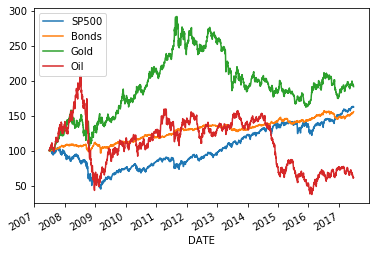

In [2]:
# Import data here
prices = pd.read_csv("datasets/asset_classes.csv", parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices) * 100

# Plot normalized
normalized.plot()
plt.show()


#### `02: Comparing stock prices with a benchmark`
You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:
- Johnson & Johnson: JNJ
- Exxon Mobil: XOM
- JP Morgan Chase: JPM
  

We have already imported pandas as pd and matplotlib.pyplot as plt.

- Use `pd.read_csv()` to import `'nyse.csv'` and `'dow_jones.csv'`, creating a `DatetimeIndex` for each from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `stocks` and `dow_jones`, respectively.
- Use `pd.concat()` along `axis=1` to combine `stocks` and `dow_jones` and assign the result to `data`. Inspect the `.info()` of `data`.
- Divide `data` by the first value for each series, multiply by 100 and plot the result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


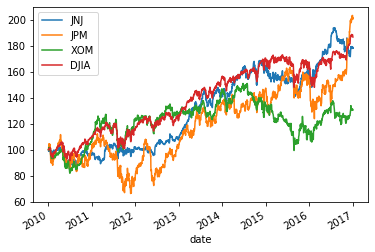

In [3]:
# Import stock prices and index here
stocks = pd.read_csv('datasets/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('datasets/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

#### `03: Plot performance difference vs benchmark index`
In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

We have already imported `pandas` as `pd` and` matplotlib.pyplot` as `plt`.

- Create the list `tickers` containing the two stock symbols.
- Use `pd.read_csv()` to import `'msft_aapl.csv'` and `'sp500.csv'`, creating a `DatetimeIndex` for each from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `stocks` and `sp500`, respectively.
- Use `pd.concat()` to concatenate `stocks` and `sp500` along `axis=1`, apply `.dropna()` to drop all missing values, and assign the result to `data`.
- Normalize `data` by dividing by the first price, multiply by 100 and assign the output to `normalized`.
- Select `tickers` from `normalized`, and subtract `normalized['SP500']` with keyword `axis=0` to align the indexes, then plot the result.

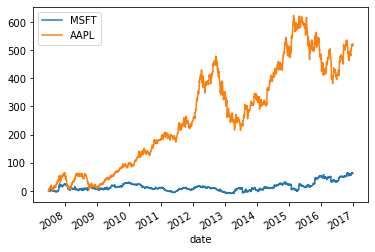

In [4]:
# Create tickers
tickers = ["MSFT", "AAPL"]

# Import stock data here
stocks = pd.read_csv('datasets/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('datasets/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()


#### `04: Convert monthly to weekly data`
We have already imported pandas as pd for you. We have also defined start and end dates.

- Create `monthly_dates` using `pd.date_range` with `start`, `end` and frequency alias `'M'`.
- Create and print the pd.Series `monthly`, passing the list `[1, 2]` as the `data` argument, and using `monthly_dates` as `index`.
- Create `weekly_dates` using `pd.date_range` with `start`, `end` and frequency alias `'W'`.
- Apply `.reindex()` to `monthly` three times: first without additional options, then with `bfill` and then with `ffill`, `print()`-ing each result.


In [5]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


#### `05: Create weekly from monthly unemployment data`

We have already imported pandas as pd and matplotlib.pyplot as plt.

- Use `pd.read_csv()` to import `'unemployment.csv'`, creating a `DateTimeIndex` from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `data`.
- Convert `data` to weekly frequency using `.asfreq()` with the alias `'W'` and show the first five rows.
- Convert again to weekly frequency, adding the option `'bfill'` and show the first five rows.
- Create weekly series, now adding the option `'ffill'`, assign to `weekly_ffill` and show the first five rows.
- Plot `weekly_ffill` starting in 2015.


            Unemployment
date                    
2010-01-03           NaN
2010-01-10           NaN
2010-01-17           NaN
2010-01-24           NaN
2010-01-31           NaN
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8
            Unemployment
date                    
2010-01-03           9.8
2010-01-10           9.8
2010-01-17           9.8
2010-01-24           9.8
2010-01-31           9.8


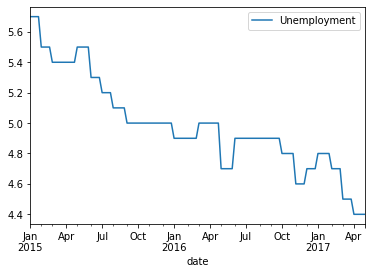

In [10]:
# Import data here
data = pd.read_csv("datasets/debt_unemployment.csv", parse_dates=['date'], index_col='date')
data = data.drop('Debt/GDP', axis=1)
# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
plt.show()



#### `06: Use interpolation to create weekly employment data`

We have imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` for you. We have also loaded the monthly unemployment rate from 2010 to 2016 into a variable `monthly`.

- Inspect `monthly` using `.info()`.
- Create a `pd.date_range()` with weekly dates, using the `.min()` and `.max()` of the `index` of `monthly` as `start` and `end`, respectively, and assign the result to `weekly_dates`.
- Apply `.reindex()` using `weekly_dates` to `monthly` and assign the output to weekly.
- Create new columns `'ffill'` and `'interpolated'` by applying `.ffill()` and `.interpolate()` to `weekly.UNRATE`.
- Show a plot of `weekly`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
None


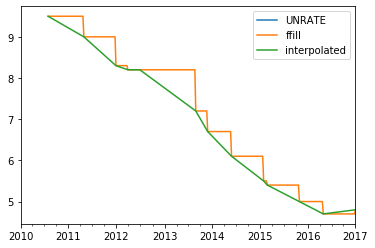

In [14]:
monthly = pd.read_csv("datasets/unrate.csv", parse_dates=['DATE'], index_col='DATE')
 # Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(start=monthly.index.min(), end=monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()


#### `07: Interpolate debt/GDP and compare to unemployment`
We have imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` for you.

- Use `pd.read_csv()` to import `'debt_unemployment.csv'`, creating a `DateTimeIndex` from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `data. print()` the `.info()` of the data.
- Apply `.interpolate()` to `data` and assign this to `interpolated`, then inspect the result.
- Plot `interpolated` with `'Unemployment'` on the `secondary_y` axis.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


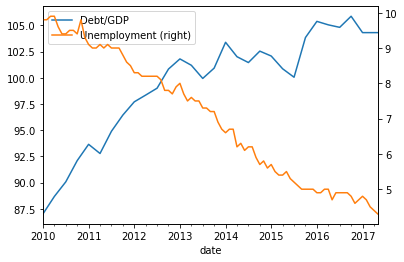

In [16]:
# Import & inspect data here
data = pd.read_csv('datasets/debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()


#### `08: Compare weekly, monthly and annual ozone trends for NYC & LA`
You have seen in the video how to downsample and aggregate time series on air quality.

First, you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

We have again imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` for you.

- Use `pd.read_csv()` to import `'ozone.csv'` and set a `DateTimeIndex` based on the `'date'` column using parse_dates and `index_col`, assign the result to `ozone` and inspect using `.info()`.
- Apply `.resample()` with weekly frequency (`'W'`) to `ozone`, aggregate using `.mean()` and plot the result.
- Repeat with monthly (`'M'`) and annual (`'A'`) frequencies, plotting each result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


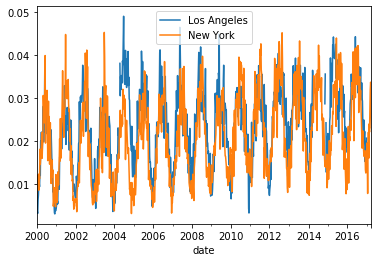

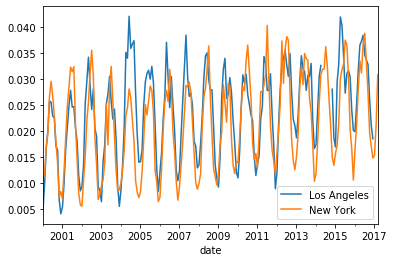

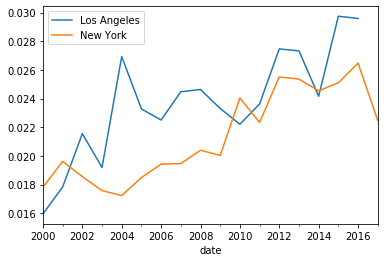

In [18]:
    # Import and inspect data here
ozone = pd.read_csv('datasets/ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()

#### `09: Compare monthly average stock prices for Facebook and Google`
Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

We have again imported pandas as pd and matplotlib.pyplot as plt for you.

- Use `pd.read_csv()` to import `'stocks.csv'` and set a `DateTimeIndex` based on the `'date'` column using `parse_dates` and `index_col`, assign the result to stocks and inspect using `.info()`.
- Create `monthly_average` by applying `.resample()` with monthly frequency to `data`, using `.mean()` to aggregate. Plot the result using `subplots`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


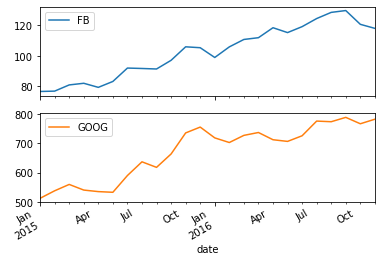

In [20]:
# Import and inspect data here
stocks = pd.read_csv('datasets/goog_fb.csv', parse_dates=['date'], index_col='date') 
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show()

#### `10: Compare quarterly GDP growth rate and stock returns`
As usual, we have imported pandas as pd and matplotlib.pyplot as plt for you.

- Use `pd.read_csv()` to import `'gdp_growth.csv'` and `'djia.csv'`, for both set a `DateTimeIndex` based on the `'date'` column using `parse_dates` and `index_col`, and assign the results to `gdp_growth` and `djia` respectively, then inspect using `.info()`.
- Resample `djia` using frequency alias `'QS'`, aggregate using `.first()`, and assign to `djia_quarterly`.
- Apply `.pct_change()` to `djia_quarterly` and `.mul()` by 100 to obtain `djia_quarterly_return`.
- Use `pd.concat()` to concatenate `gdp_growth` and `djia_quarterly_return` along `axis=1`, and assign to `data`. Rename the columns using `.columns` and the new labels `'gdp'` and `'djia'`, then `.plot()` the results.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


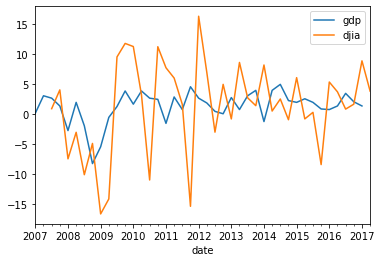

In [23]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('datasets/gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())

# Import and inspect djia here
djia = pd.read_csv('datasets/djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())


# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth,djia_quarterly_return], axis=1)
data.columns = ['gdp','djia']
data.plot()
plt.show()



#### `11: Visualize monthly mean, median and standard deviation of S&P500 returns`

As usual, we have imported pandas as pd and matplotlib.pyplot as plt for you.

- Use `pd.read_csv()` to import `'sp500.csv'`, set a `DateTimeIndex` based on the `'date'` column using `parse_dates` and `index_col`, assign the results to `sp500`, and inspect using `.info()`.
- Convert `sp500` to a `pd.Series()` using `.squeeze()`, and apply `.pct_change()` to calculate `daily_returns`.
- `.resample()` `daily_returns` to month-end frequency (alias: `'M'`), and apply `.agg()` to calculate `'mean'`, `'median'`, and `'std'`. Assign the result to stats.
- `.plot()` stats.



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB
None


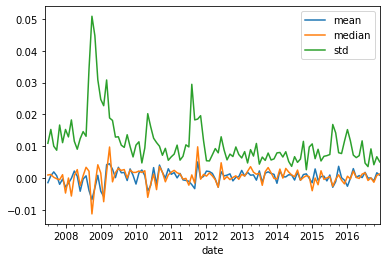

In [24]:
# Import data here
sp500 = pd.read_csv('datasets/sp500.csv', parse_dates=['date'], index_col='date')
print(sp500.info())

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean','median','std'])

# Plot stats here
stats.plot()
plt.show()



#### `The End`